<a href="https://colab.research.google.com/github/drickkarmokar5776/Machine-learning---Predictive-Analytics-for-Treatment-Outcomes-in-Hospital-Patients-/blob/main/Project01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries

import warnings
from sklearn.exceptions import DataConversionWarning

# Suppress warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

# Your existing code for model training and fitting
# ...

# Restore warnings (if desired)
warnings.filterwarnings(action='default', category=UserWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset (assuming it's stored in a CSV file)
data = pd.read_csv('train_patient.csv')

# Assuming 'Effective' is the target variable (1 for effective, 0 for not effective)
# Prepare features (X) and target (y)
X = data[['Age', 'Disease', 'Gender']]
y = data['Effective']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Define hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search CV to find best parameters
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_

# Predictions on the test set
predictions = best_rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

# Load new testing data from CSV file
test_patient = pd.read_csv('test_patient.csv')

# Preprocess new data from CSV (assuming it has columns 'Age', 'Disease', 'Gender')
# Assuming 'test_patient' has columns similar to 'X' in structure
new_data = test_patient[['Age', 'Disease', 'Gender']]
new_data_encoded = pd.get_dummies(new_data)  # One-hot encode categorical variables

# Ensure new_data_encoded has the same columns as X_train for consistency in prediction
missing_cols = set(X_train.columns) - set(new_data_encoded.columns)
for col in missing_cols:
    new_data_encoded[col] = 0  # Add missing columns filled with zeros

# Reorder columns to match X_train
new_data_encoded = new_data_encoded[X_train.columns]

# Make predictions for new data
new_predictions = best_rf.predict(new_data_encoded)

# Add predictions to the test_patient DataFrame
test_patient['Predicted_Effective'] = new_predictions

# Save updated test_patient DataFrame to a new CSV file
test_patient.to_csv('test_patient_predictions.csv', index=False)

# Print the updated DataFrame with predictions
print(test_patient)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.25925925925925924
               Name  Age      Disease   Gender  Treatment Cost Effective  \
0          John Doe   35      Malaria     Male             500       75%   
1        Jane Smith   28      Typhoid   Female             800       85%   
2   Michael Johnson   42   Salmonella     Male             600       68%   
3       Emily Brown   20      Measles   Female             400       93%   
4       David White   50      Malaria     Male             550       72%   
..              ...  ...          ...      ...             ...       ...   
79      Zainab Khan   21      Measles   Female             410       92%   
80      Omar Farooq   34      Malaria     Male             590       73%   
81      Aisha Jamal   23      Typhoid   Female             770       79%   
82   Yusuf Mohammed   37   Salmonella     Male             670       68%   
83     Khadija Omar   19      Measles   Female             390       94%   

   Predicted_Effective  
0                  75%  
1      

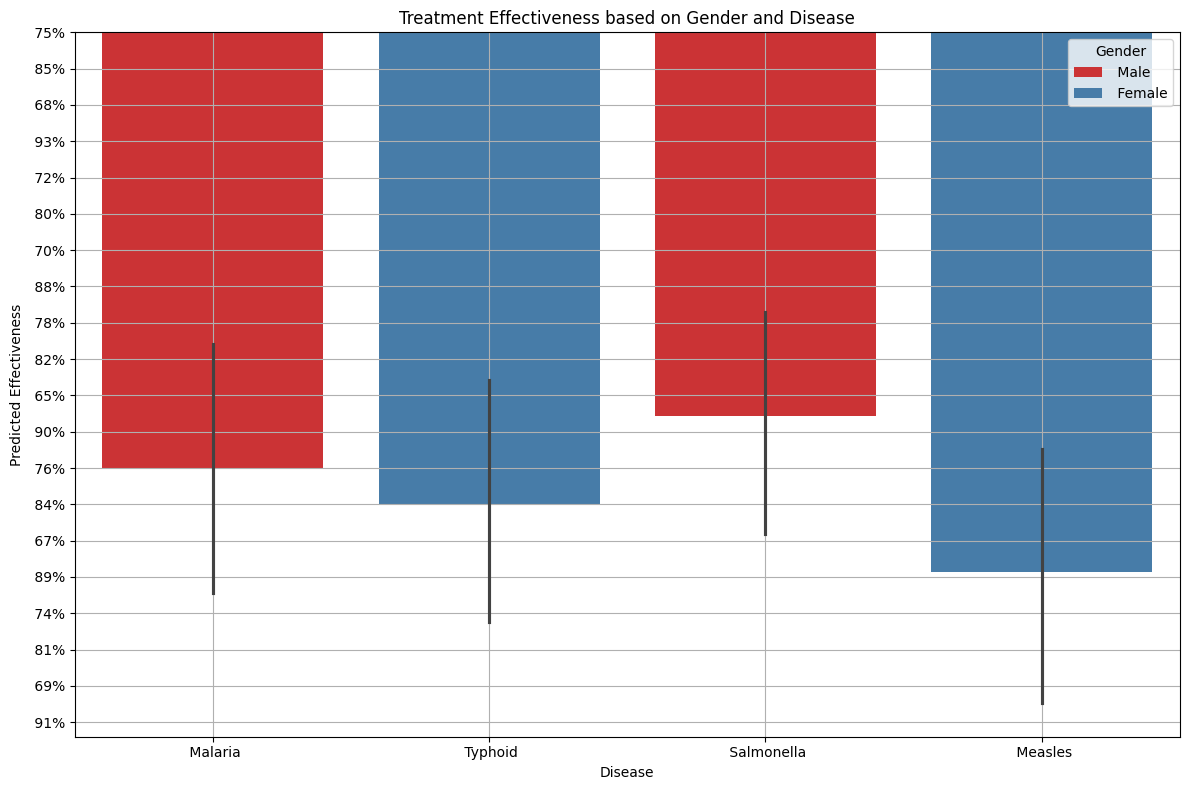

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(data=test_patient, x='Disease', y='Effective', hue='Gender', palette='Set1')
plt.title('Treatment Effectiveness based on Gender and Disease')
plt.xlabel('Disease')
plt.ylabel('Predicted Effectiveness')
plt.legend(title='Gender', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()



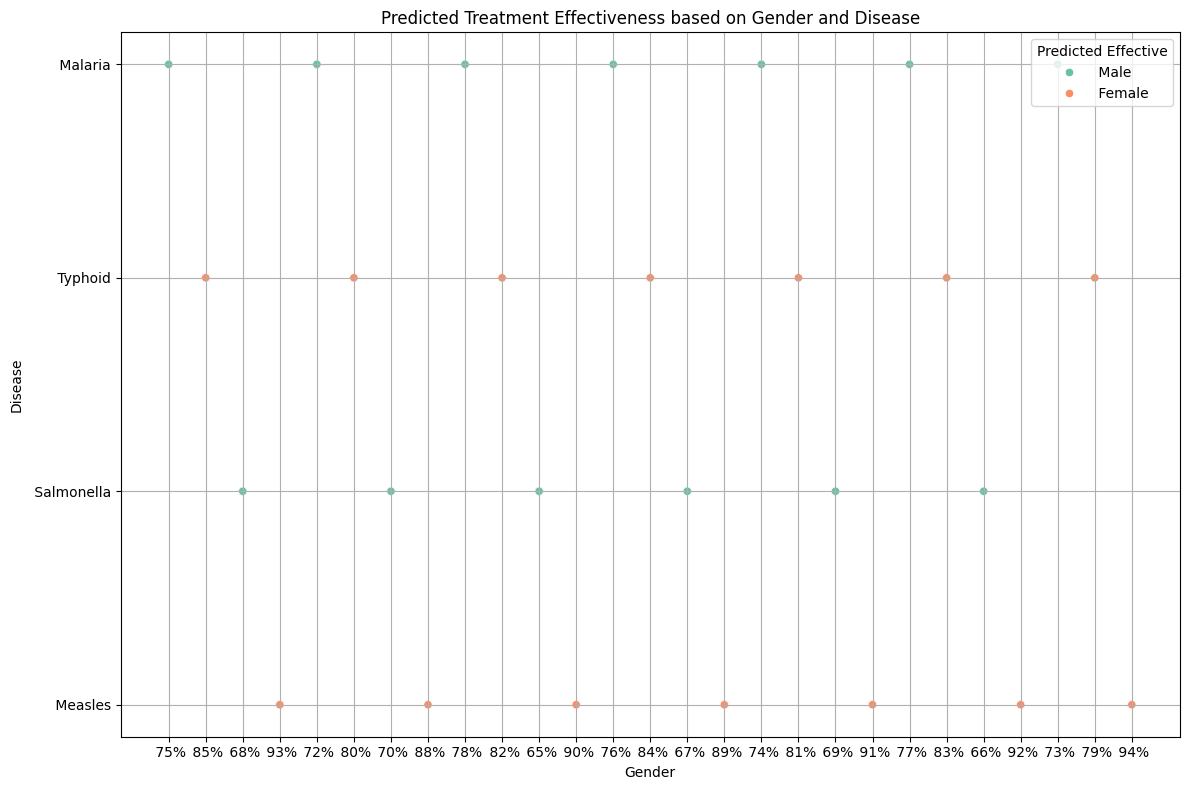

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=test_patient, x='Effective', y='Disease', hue='Gender', palette='Set2')
plt.title('Predicted Treatment Effectiveness based on Gender and Disease')
plt.xlabel('Gender')
plt.ylabel('Disease')
plt.legend(title='Predicted Effective', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize

# Load the hospital data (assuming it's stored in a CSV file)
hospital_data = pd.read_csv('train_patient.csv')

# Extract features (Age, Disease, Gender) and target variable (Effective)
X = hospital_data[['Age', 'Disease', 'Gender']]
y = hospital_data['Effective']

# Perform one-hot encoding to convert categorical variables to numerical
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define hyperparameters for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search CV to find the best model with KFold
cv = KFold(n_splits=2, shuffle=True, random_state=42)  # Adjusted to 2 splits
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit grid search
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_

# Predictions on the test set
y_pred_proba = best_rf_model.predict_proba(X_test)

# Convert y_test to binary format for each class separately
classes = best_rf_model.classes_
y_test_bin = label_binarize(y_test, classes=classes)

# Compute F2 score for each classprecision, recall, f2_score, _ = precision_recall_fscore_support(y_test, y_pred, beta=2, average=None, labels=classes)
precision, recall, f2_score, _ = precision_recall_fscore_support(y_test, y_pred, beta=2, average=None, labels=classes)

# Print F2 score for each class
for i, disease_class in enumerate(classes):
    print(f'{disease_class} F2 Score: {f2_score[i]:.2f}')

Fitting 2 folds for each of 81 candidates, totalling 162 fits
 65% F2 Score: 0.00
 66% F2 Score: 0.00
 67% F2 Score: 0.00
 68% F2 Score: 0.00
 70% F2 Score: 0.00
 71% F2 Score: 0.00
 72% F2 Score: 0.00
 73% F2 Score: 0.00
 74% F2 Score: 0.00
 75% F2 Score: 0.00
 76% F2 Score: 0.00
 77% F2 Score: 0.56
 78% F2 Score: 0.00
 79% F2 Score: 0.56
 80% F2 Score: 0.00
 81% F2 Score: 0.00
 82% F2 Score: 0.00
 83% F2 Score: 0.00
 84% F2 Score: 0.00
 85% F2 Score: 0.00
 86% F2 Score: 0.00
 87% F2 Score: 0.00
 88% F2 Score: 0.00
 89% F2 Score: 1.00
 90% F2 Score: 0.56
 91% F2 Score: 0.56
 92% F2 Score: 0.83
 93% F2 Score: 0.00
 94% F2 Score: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
